In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from IPython import embed

In [2]:
def plot_cameras(extrinsic_matrices, ax):
    """
    Visualizes the extrinsics of multiple cameras in 3D space.

    Parameters:
    - extrinsic_matrices (numpy.ndarray): Array of camera extrinsics matrices (Nx4x4).
    """
    #ax = plt.figure().add_subplot(projection='3d')
    #fig3d = plt.figure()
    #ax = Axes3D(fig3d)
    print(ax)

    for camera_extrinsics in extrinsic_matrices:
        # Extract translation and rotation from camera extrinsics matrix
        translation = camera_extrinsics[:3, 3]
        rotation_matrix = camera_extrinsics[:3, :3]

        # Plot camera position
        ax.scatter(*translation, marker='o')

        # Plot camera orientation axes
        origin = translation
        for i in range(3):
            axis_direction = rotation_matrix[:,i] 
            if i == 0:
                ax.quiver(*origin, *axis_direction, length=0.5, normalize=True)
            else:
                ax.quiver(*origin, *axis_direction, length=1, normalize=True)
        # Plot camera direction
        z = -1 * rotation_matrix[:,2]
        ax.quiver(*origin, *z, length=1, normalize=True, color='r', alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Multiple Cameras Extrinsics Visualization')

    ax.set_xlim(-1,0.2)
    ax.set_ylim(0.5,3.5)
    ax.set_zlim(-5,-1.5)

    plt.show()

In [3]:
old_poses = np.load('flower_poses_34.npy')

In [4]:
old_poses.shape

(34, 3, 5)

In [5]:
old_poses[:,:,:4]

array([[[ 9.99821961e-01, -1.51263652e-02,  1.12740248e-02,
         -3.37615997e-01],
        [ 1.52765503e-02,  9.99794126e-01, -1.33563234e-02,
          1.37049124e-01],
        [-1.10696713e-02,  1.35261714e-02,  9.99847174e-01,
         -7.82049522e-02]],

       [[ 9.99788165e-01, -1.49210682e-02,  1.41706187e-02,
         -2.64712602e-01],
        [ 1.50507176e-02,  9.99845505e-01, -9.08686966e-03,
          1.38807625e-01],
        [-1.40328417e-02,  9.29822307e-03,  9.99858260e-01,
         -7.87201151e-02]],

       [[ 9.99829948e-01, -1.43863838e-02,  1.15331290e-02,
         -2.07521304e-01],
        [ 1.45141697e-02,  9.99833345e-01, -1.10737374e-02,
          1.39445201e-01],
        [-1.13718957e-02,  1.12392493e-02,  9.99872148e-01,
         -5.94978072e-02]],

       [[ 9.99916375e-01, -1.22735966e-02,  4.05835547e-03,
         -9.97386426e-02],
        [ 1.23182312e-02,  9.99861836e-01, -1.11620054e-02,
          1.37721464e-01],
        [-3.92079679e-03,  1.12110646

In [6]:
new_poses = []
for i in range(len(old_poses)):
    hom = np.array([[0.,0.,0.,1.]], dtype = old_poses.dtype)
    tmp = np.append(old_poses[i, :, :4], hom, axis=0)
    new_poses.append(tmp)
    
new_poses = np.stack(new_poses, axis = 0)

In [7]:
new_poses.shape

(34, 4, 4)

In [8]:
np.min(new_poses)

-0.337616

Axes3D(0.125,0.11;0.775x0.77)


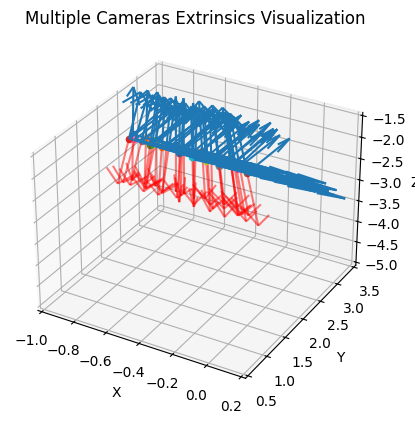

In [9]:
ax = plt.figure().add_subplot(projection='3d')
plot_cameras(new_poses, ax)